<Axes: title={'center': 'Size of population per sampling operation (all speces)'}, xlabel='date_operation'>

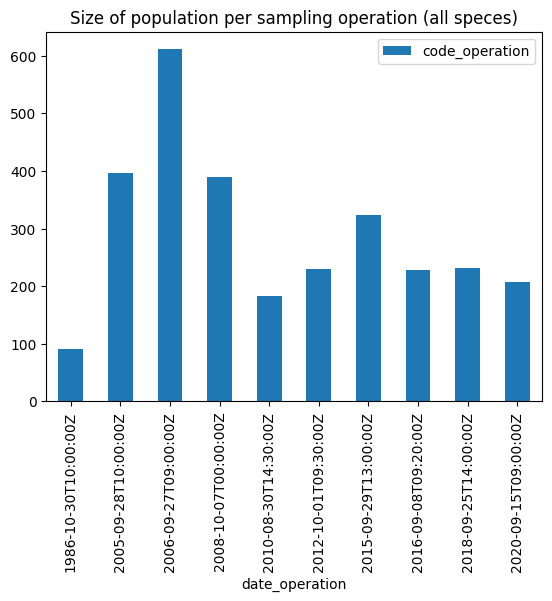

In [1]:
import json

import pandas as pd
import pygwalker as pyg
import ssl
import math as math

# This is needed to avoid issues at runtime. 
# TODO: Understand what is the lib that imposes SSL certificates validation.
ssl._create_default_https_context = ssl._create_unverified_context

# This is needed to visualize all the columns of the data frames.
# It seems that there is a max.columns value by default, then data framees are truncated.
pd.set_option("display.max.columns", None)

# Read the file containing the temperature observations
# Load the content in the form of a dataframe. 
# Here we use read_json but read_csv is also possible.
file = open('data/data.27239_poisson_page1_processed.json')
df = pd.read_json(file)

# We can extract subsets of a dataframe via simple filtering as shown below.
operations = df[[ "date_operation", "code_operation"]]

# Then, we can display the dataframes as charts by using the plot operation. 
# Ex. operations.groupby(['date_operation']).count().plot(kind='barh')
# /!\ Data insigth: how many sampling operations have been documented in the API?
operations.groupby(['date_operation']).count().plot.bar(title='Size of population per sampling operation (all speces)')

<Axes: title={'center': 'Amount of of individuals per spece (all samplings)'}, xlabel='date_operation'>

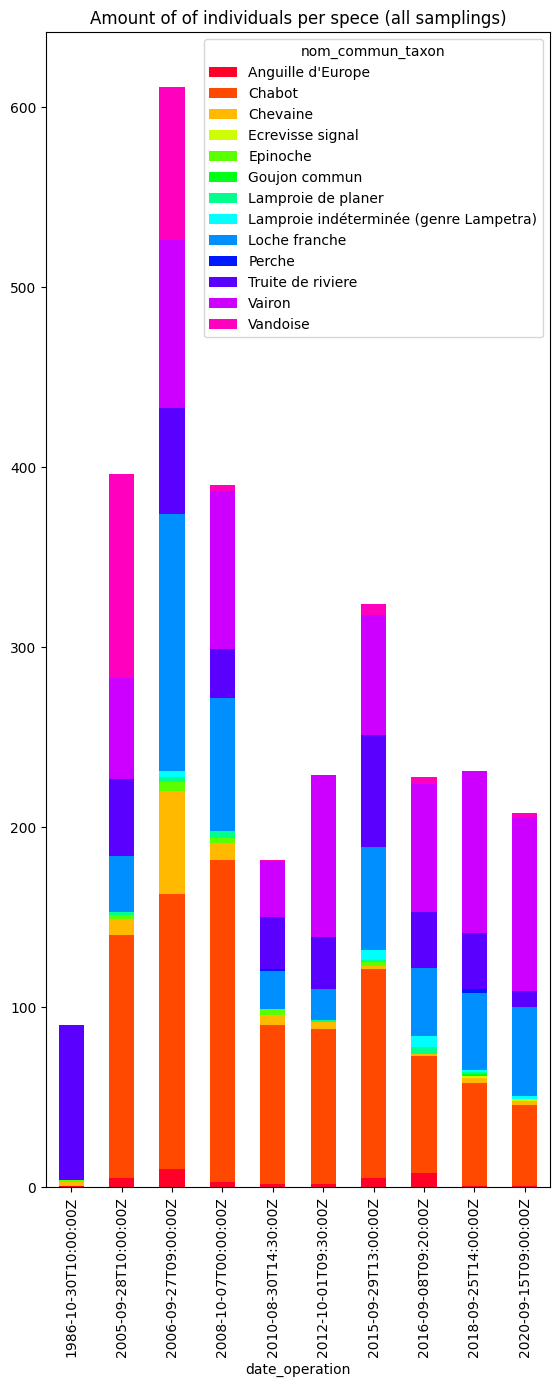

In [2]:
fish_perSpece = df[['nom_commun_taxon', 'date_operation']]
cube_fish_perSpece = fish_perSpece.groupby(['date_operation', 'nom_commun_taxon'])['date_operation'].count()
fish_perSpece.groupby(['date_operation', 'nom_commun_taxon'])['date_operation'].count().unstack().plot.bar(title='Amount of of individuals per spece (all samplings)', figsize=(6.5,15), stacked=True, colormap='gist_rainbow')

<Axes: title={'center': 'Amount of of individuals per spece (all samplings)'}, xlabel='nom_commun_taxon'>

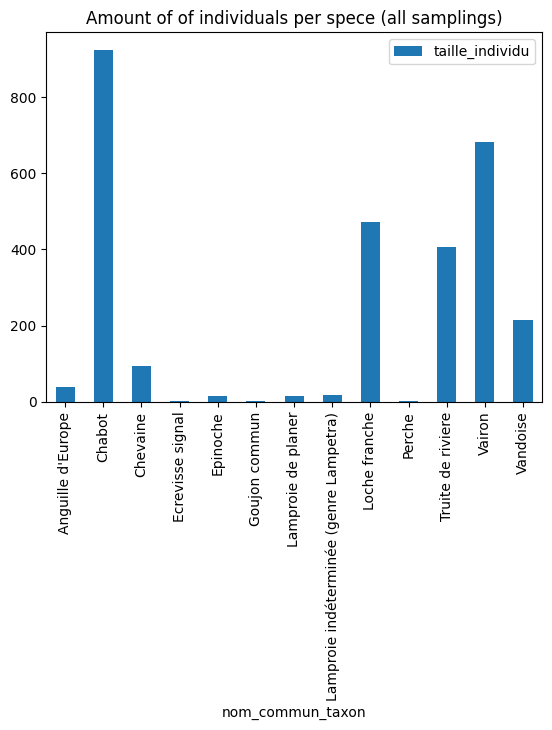

In [3]:
fish = df[[ 'nom_commun_taxon', 'taille_individu']]
fish.groupby(['nom_commun_taxon']).count().sort_values(by=['nom_commun_taxon']).plot.bar(title='Amount of of individuals per spece (all samplings)')

<Axes: title={'center': 'Average size of individuals per spece (all samplings)'}, xlabel='nom_commun_taxon'>

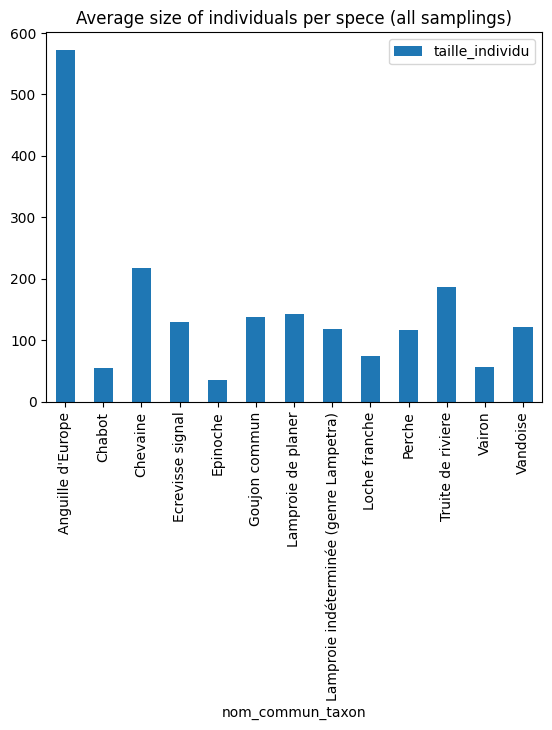

In [4]:
# /!\ Data insigth: which are the fish speces and its size found during these sampling operations?
fish.groupby(['nom_commun_taxon']).mean().sort_values(by=['nom_commun_taxon']).plot.bar(title='Average size of individuals per spece (all samplings)')

array([<Axes: title={'center': "Anguille d'Europe"}, xlabel='date_operation'>,
       <Axes: title={'center': 'Chabot'}, xlabel='date_operation'>,
       <Axes: title={'center': 'Chevaine'}, xlabel='date_operation'>,
       <Axes: title={'center': 'Ecrevisse signal'}, xlabel='date_operation'>,
       <Axes: title={'center': 'Epinoche'}, xlabel='date_operation'>,
       <Axes: title={'center': 'Goujon commun'}, xlabel='date_operation'>,
       <Axes: title={'center': 'Lamproie de planer'}, xlabel='date_operation'>,
       <Axes: title={'center': 'Lamproie indéterminée (genre Lampetra)'}, xlabel='date_operation'>,
       <Axes: title={'center': 'Loche franche'}, xlabel='date_operation'>,
       <Axes: title={'center': 'Perche'}, xlabel='date_operation'>,
       <Axes: title={'center': 'Truite de riviere'}, xlabel='date_operation'>,
       <Axes: title={'center': 'Vairon'}, xlabel='date_operation'>,
       <Axes: title={'center': 'Vandoise'}, xlabel='date_operation'>],
      dtype=object)

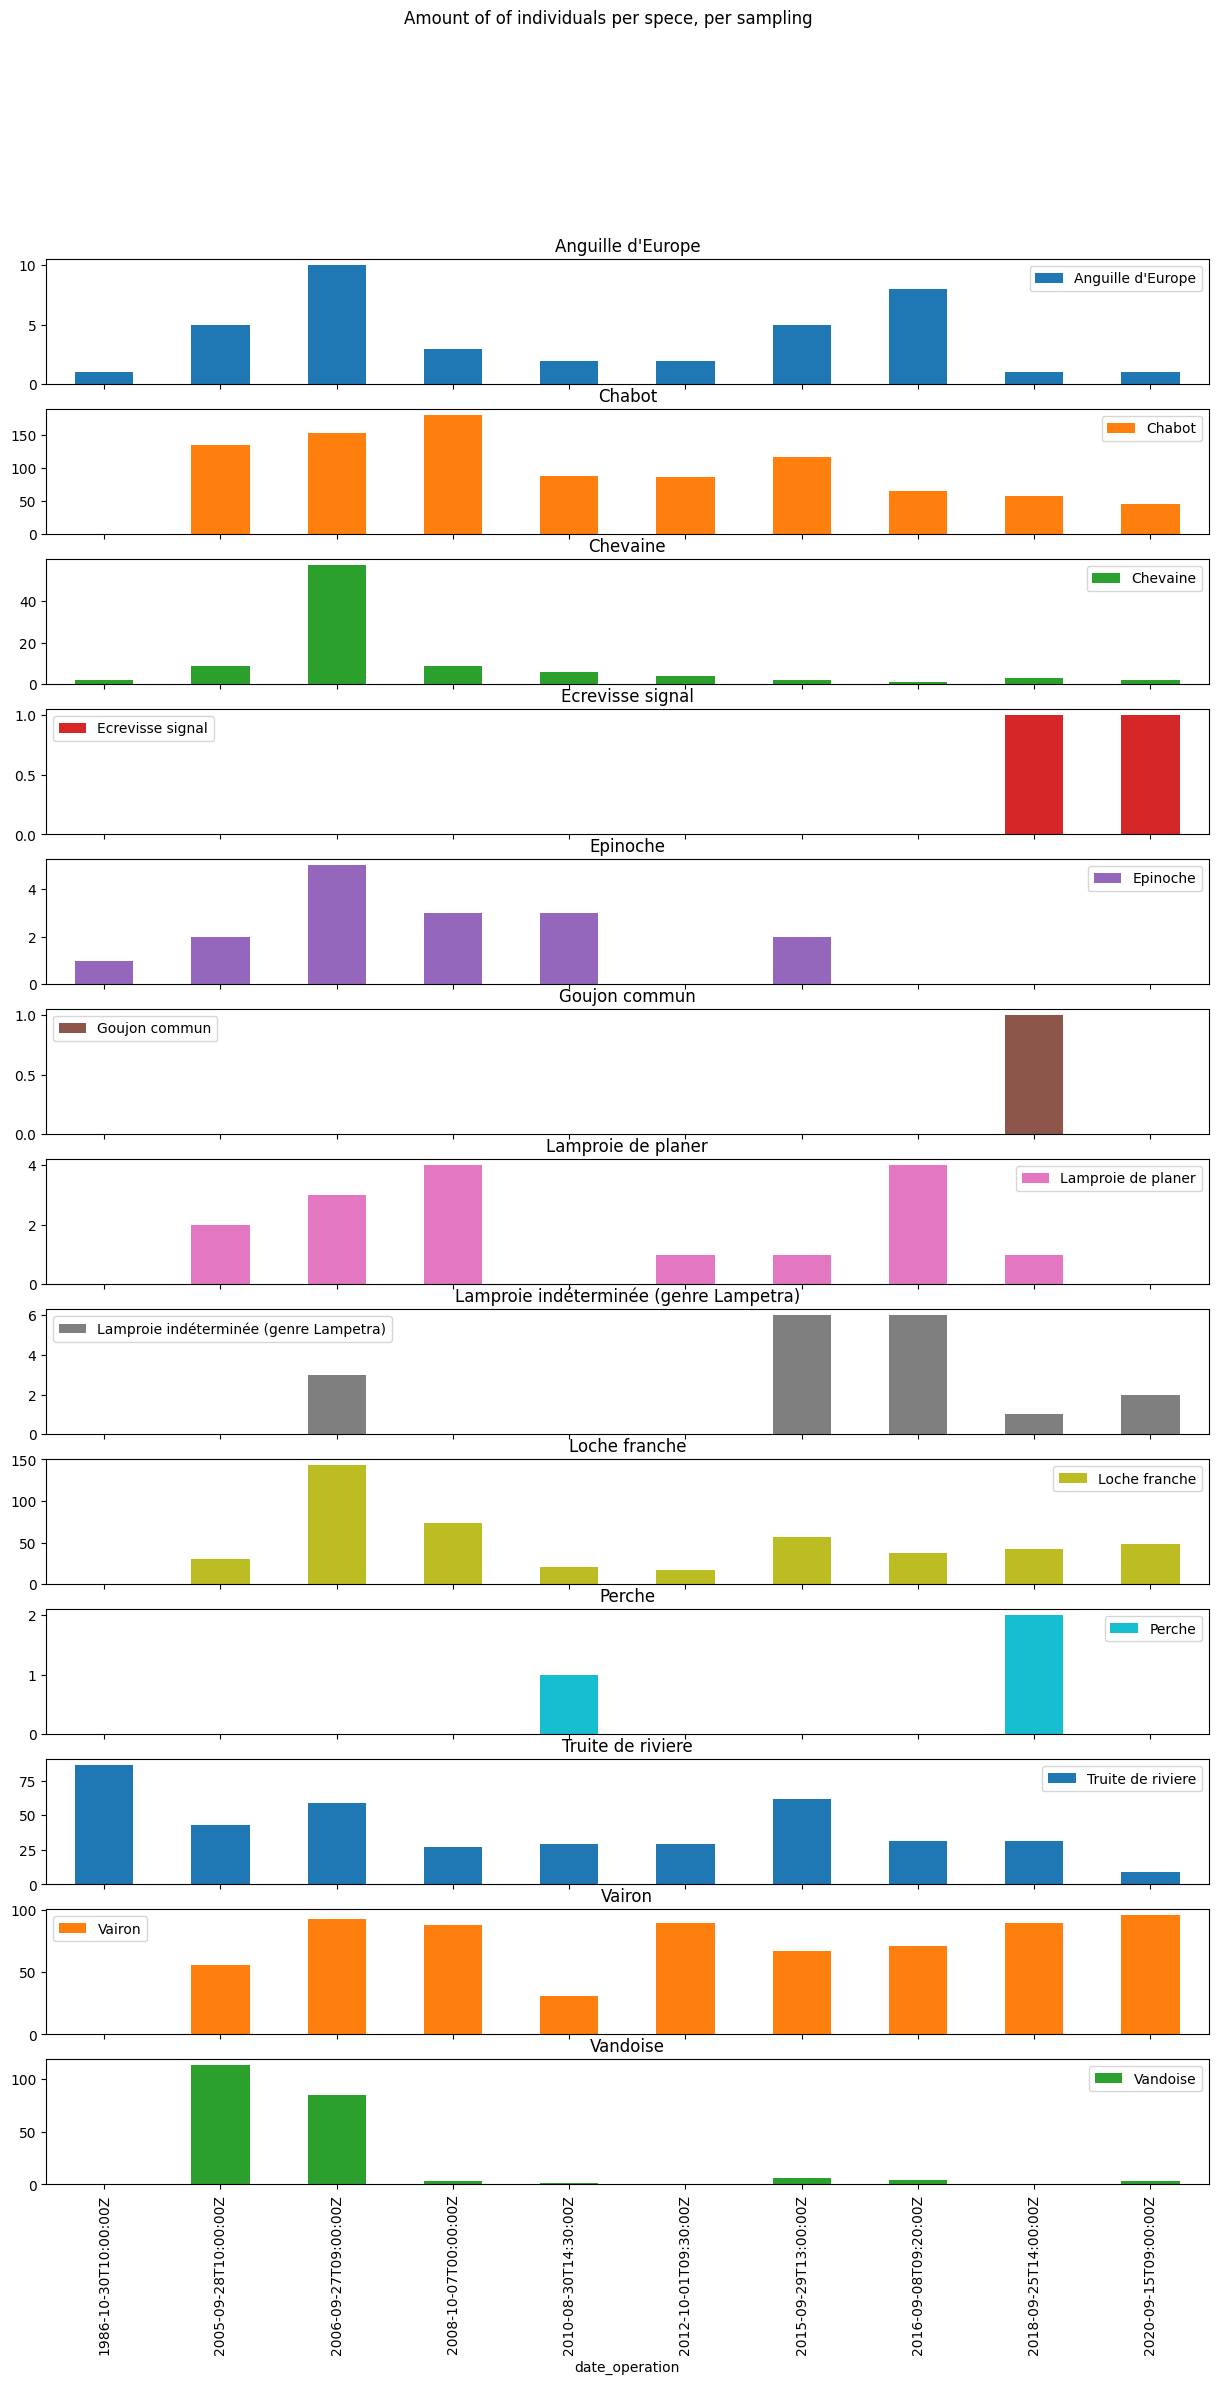

In [5]:
fish_perSpece.groupby(['date_operation', 'nom_commun_taxon'])['date_operation'].count().unstack().plot.bar(title='Amount of of individuals per spece, per sampling', figsize=(15,25), subplots=True)

array([<Axes: title={'center': "Anguille d'Europe"}, xlabel='date_operation'>,
       <Axes: title={'center': 'Chabot'}, xlabel='date_operation'>,
       <Axes: title={'center': 'Chevaine'}, xlabel='date_operation'>,
       <Axes: title={'center': 'Ecrevisse signal'}, xlabel='date_operation'>,
       <Axes: title={'center': 'Epinoche'}, xlabel='date_operation'>,
       <Axes: title={'center': 'Goujon commun'}, xlabel='date_operation'>,
       <Axes: title={'center': 'Lamproie de planer'}, xlabel='date_operation'>,
       <Axes: title={'center': 'Lamproie indéterminée (genre Lampetra)'}, xlabel='date_operation'>,
       <Axes: title={'center': 'Loche franche'}, xlabel='date_operation'>,
       <Axes: title={'center': 'Perche'}, xlabel='date_operation'>,
       <Axes: title={'center': 'Truite de riviere'}, xlabel='date_operation'>,
       <Axes: title={'center': 'Vairon'}, xlabel='date_operation'>,
       <Axes: title={'center': 'Vandoise'}, xlabel='date_operation'>],
      dtype=object)

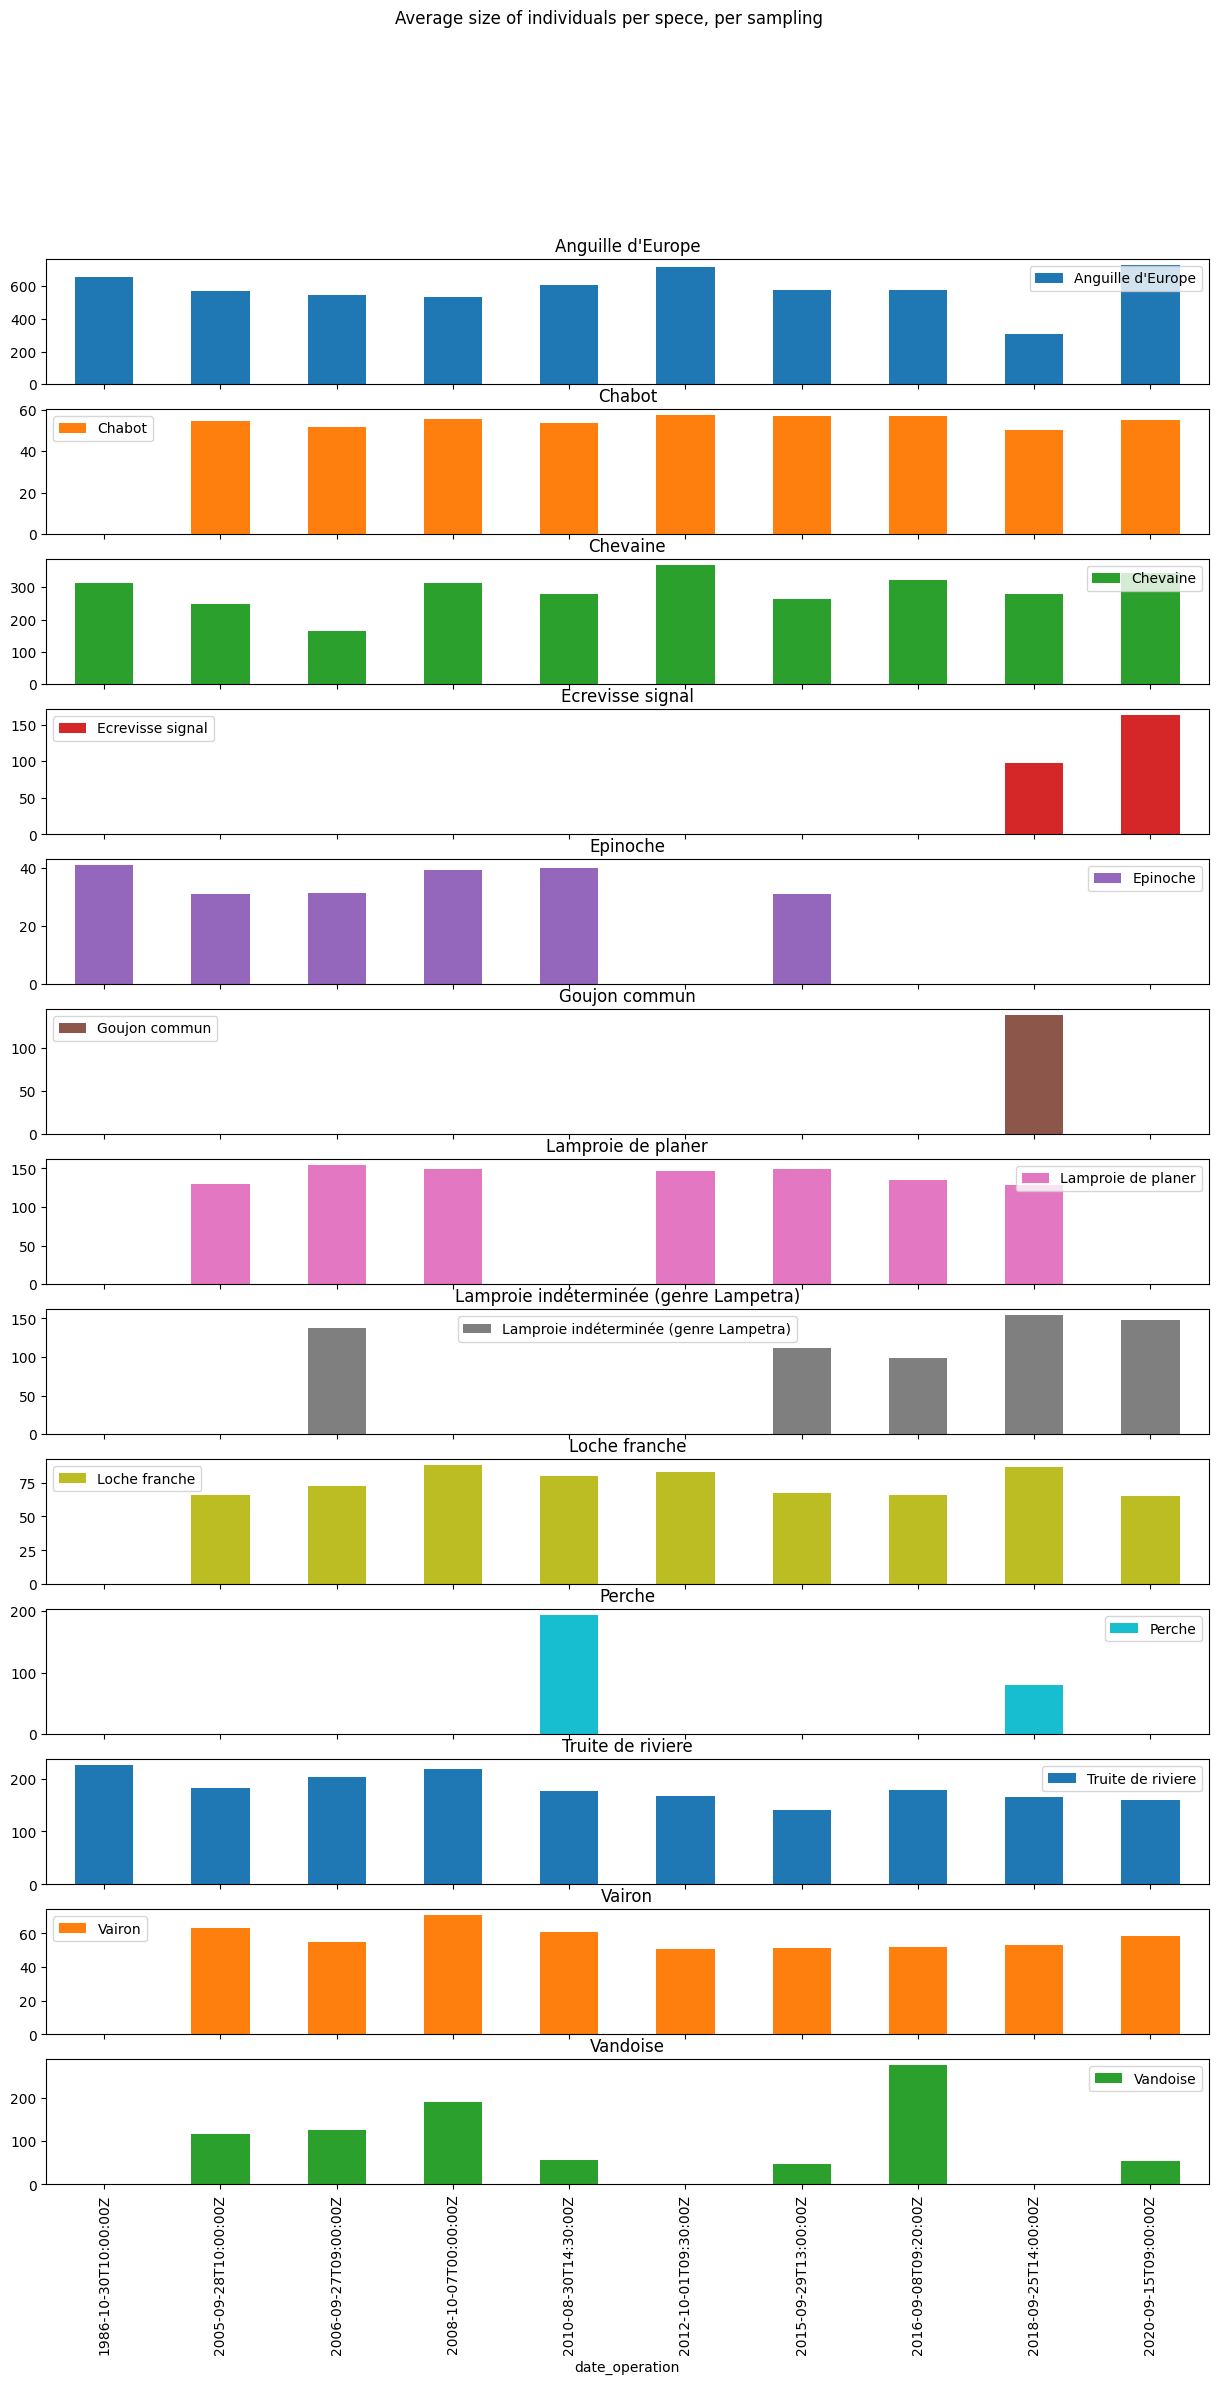

In [6]:
sizedFish_perSpece = df[['nom_commun_taxon', 'date_operation', 'taille_individu']]
sizedFish_perSpece.groupby(['date_operation', 'nom_commun_taxon'])['taille_individu'].mean().unstack().plot.bar(title='Average size of individuals per spece, per sampling', figsize=(15,25), subplots=True)

<Axes: title={'center': "Amount of individuals per sampling. Spece: Anguille d'Europe"}, xlabel='date_operation'>

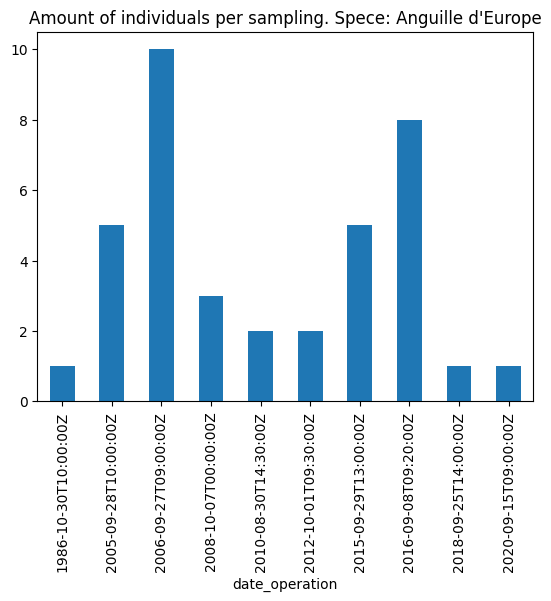

In [7]:
# Now that I have a bi-dimensional chart, I would like to create a dataframe with three dimensions
# and draw it as a chart. 
# /!\ Data insigth: what is the amount of individuals found during each sampling operation for each fish spece?
# I will use the date of the operation as I plan to do corelations with other measures in the time.
df_anguille = df.loc[df['nom_commun_taxon'] == "Anguille d'Europe"]
cube_anguille = df_anguille[[ 'nom_commun_taxon', 'taille_individu', 'date_operation']]
cube_anguille.groupby(['date_operation'])['taille_individu'].count().plot.bar(title="Amount of individuals per sampling. Spece: Anguille d'Europe")

<Axes: title={'center': "Average size of individuals per sampling. Spece: Anguille d'Europe"}, xlabel='date_operation'>

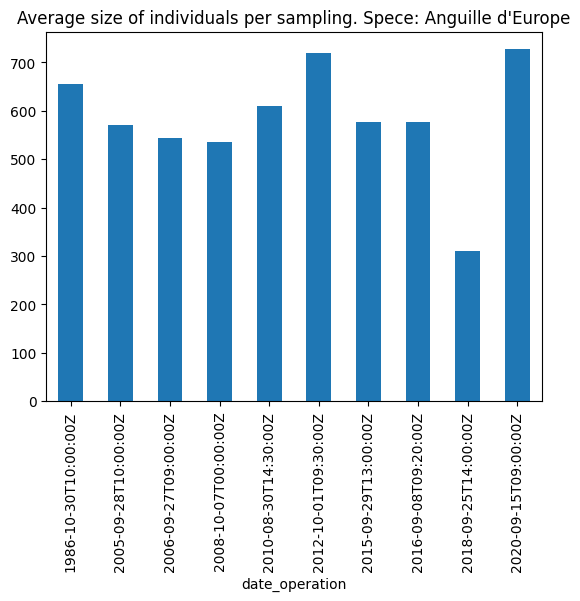

In [8]:
cube_anguille.groupby(['date_operation'])['taille_individu'].mean().plot.bar(title="Average size of individuals per sampling. Spece: Anguille d'Europe")

<Axes: title={'center': 'Amount of individuals per sampling. Spece: Chabot'}, xlabel='date_operation'>

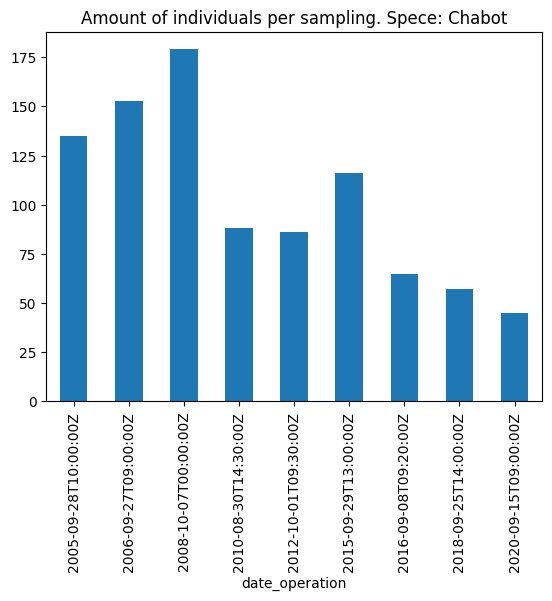

In [9]:
df_chabot = df.loc[df['nom_commun_taxon'] == 'Chabot']
cube_chabot = df_chabot[[ 'nom_commun_taxon', 'taille_individu', 'date_operation']]
cube_chabot.groupby(['date_operation'])['taille_individu'].count().plot.bar(title='Amount of individuals per sampling. Spece: Chabot')

<Axes: title={'center': 'Average size of individuals per sampling. Spece: Chabot'}, xlabel='date_operation'>

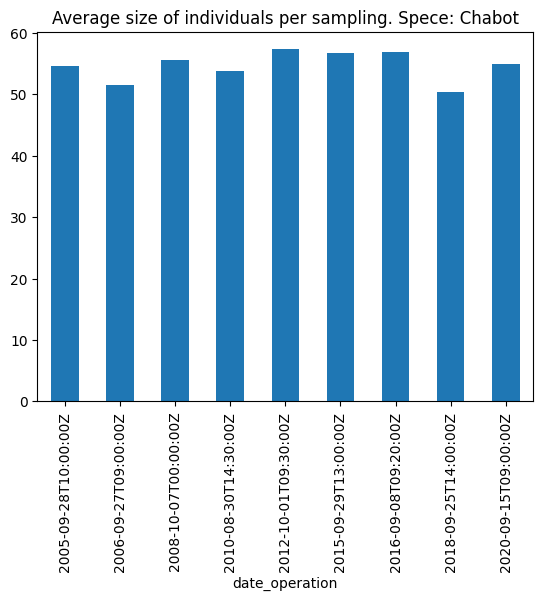

In [10]:
cube_chabot.groupby(['date_operation'])['taille_individu'].mean().plot.bar(title='Average size of individuals per sampling. Spece: Chabot')

<Axes: ylabel='Density'>

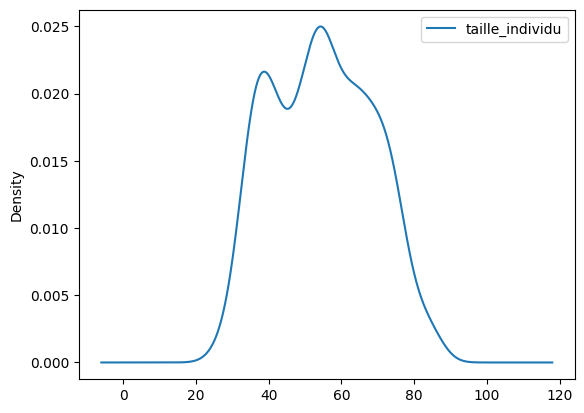

In [11]:
cube_chabot.plot(kind='kde')

In [12]:
stats = df.groupby(['nom_commun_taxon', 'date_operation'])['taille_individu'].agg(['mean', 'count', 'std'])
print(stats)
print('-'*30)

ci95_hi = []
ci95_lo = []

for i in stats.index:
    mean, count, std = stats.loc[i]
    ci95_hi.append(mean + 1.96 * std / math.sqrt(count))
    ci95_lo.append(mean - 1.96 * std / math.sqrt(count))

stats['ci95_lo'] = ci95_lo
stats['ci95_hi'] = ci95_hi

print(stats)

# Above code has been taken from: https://stackoverflow.com/questions/53519823/confidence-interval-in-python-dataframe

                                              mean  count         std
nom_commun_taxon  date_operation                                     
Anguille d'Europe 1986-10-30T10:00:00Z  655.000000      1         NaN
                  2005-09-28T10:00:00Z  571.000000      5  159.781100
                  2006-09-27T09:00:00Z  543.900000     10  132.310619
                  2008-10-07T00:00:00Z  536.333333      3  163.353400
                  2010-08-30T14:30:00Z  609.500000      2  292.035101
...                                            ...    ...         ...
Vandoise          2008-10-07T00:00:00Z  191.000000      3  114.503275
                  2010-08-30T14:30:00Z   57.000000      1         NaN
                  2015-09-29T13:00:00Z   46.666667      6    2.065591
                  2016-09-08T09:20:00Z  275.500000      4   19.052559
                  2020-09-15T09:00:00Z   53.666667      3    1.527525

[87 rows x 3 columns]
------------------------------
                                    

<Axes: xlabel='nom_commun_taxon'>

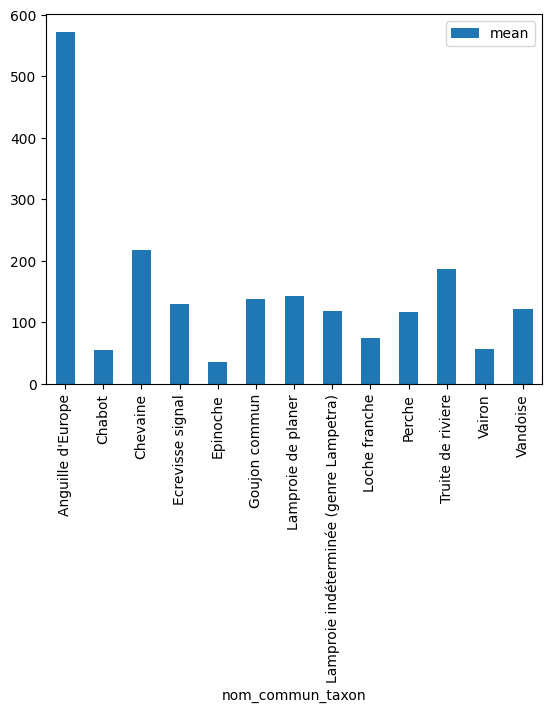

In [13]:
df.groupby(['nom_commun_taxon'])['taille_individu'].agg(['mean']).plot.bar()
